Churn Prediction

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [106]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [107]:
!wget $data

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [108]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [109]:
len(df)

7043

Initial Data Preparation

In [110]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
# We transpose to see all columns
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [112]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [113]:
# We prepare the data

df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns
string_columns = list(df.dtypes[df.dtypes == "object"].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [114]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [115]:
df.dtypes
# we can see that the type of total charges is an object. It should be a float/int

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [116]:
df["totalcharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [117]:
# we have to convert all values to numbers
# pd.to_numeric(df["totalcharges"])
# this shows the position at which the conversion cannot be carried out
# It also shows what kind of data causes the issue. In our case "_". It can either be caused by an 
# underscore or a space.
#  we will convert/coerce the error to Nan, and then replace the Nan with 0


df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors="coerce")
df[df.totalcharges.isnull()][["customerid", "totalcharges"]]
df["totalcharges"].iloc[488]
df["totalcharges"] = df["totalcharges"].fillna(0)
df["totalcharges"].iloc[488]
df["totalcharges"][df["totalcharges"] == 0]
df["totalcharges"][df["totalcharges"] == 0].value_counts()
df[df.totalcharges == 0][["customerid", "totalcharges"]]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [118]:
# We check our churn variable and convert it no numbers, not yes/no
# (yes = true = 1) and (no = 0 = false)
df.churn
df.churn.head(5)
(df.churn == "yes").astype(int).head()
df.churn = (df.churn == "yes").astype(int)

In [119]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

Setting up Validation Framework using Scikit

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
# to see the documentation
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [122]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test), len(df)

(5634, 1409, 7043)

In [123]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)
len(df_train), len(df_val), len(df_test), len(df_full_train), len(df)

(4225, 1409, 1409, 5634, 7043)

In [124]:
# We reset the index and extract the y values

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [125]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [126]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

# Exploratory Data Analysis
- Check missing values
- Look at the target values (churn)
- Look at numerical and Categorical Variables

In [127]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [128]:
# value_counts counts the number of all values in the column
# This shows us the number of churning users(1) and non-churning users(0)
df_full_train.churn.value_counts()
df_full_train.churn.value_counts(normalize=True)        #This shows percentage
# The "1" shows us the churn rate

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [129]:
# We can also compute the churn rate using the mean
df_full_train.churn.mean()
# This gives the same value because the mean is calculated using "1s"

np.float64(0.26996805111821087)

In [130]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 3)
# 27% of users are churning
# This gives an understanding of our target variable

np.float64(0.27)

In [131]:
# We consider our feature Variables - categorical or numerical
df_full_train.nunique()
# This shows you the categorical variables even though they might be numerical variables
# df_full_train.dtypes

customerid          5634
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1494
totalcharges        5291
churn                  2
dtype: int64

In [132]:
# We group the categorical separate from numerical
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [133]:
df_full_train[categorical]
df_full_train[categorical].nunique()
# some of the categorical variables are binary

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature Importance

In [134]:
female_mean = df_full_train[df_full_train.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_full_train[df_full_train.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


In [135]:
female_mean / global_churn_rate


np.float64(1.0253955354648652)

In [136]:
male_mean / global_churn_rate

np.float64(0.9749802969838747)

In [137]:
partner_yes = df_full_train[df_full_train.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_full_train[df_full_train.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [138]:
partner_yes / global_churn_rate

np.float64(0.7594724924338315)

In [139]:
partner_no / global_churn_rate

np.float64(1.2216593879412643)

In [140]:
df_group = df_full_train.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [141]:
from IPython.display import display

In [142]:
for col in categorical:
    df_group = df_full_train.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


# Feature Importance: Mutual Information 

In [143]:
# Mutual information is a concept that tells us how much we can learn about one variable if we know the value of another.
# How do we know what variable is more important in churn prediction
# Is gender more important than contract, partner, etc
from sklearn.metrics import mutual_info_score

In [144]:
mutual_info_score(df_full_train.churn, df_full_train.contract)
# This tells us how much we learn about churn by observing the contract variable

0.0983203874041556

In [145]:
mutual_info_score(df_full_train.churn, df_full_train.gender)
# This tells us that gender is not a big consideration for churn

0.0001174846211139946

In [146]:
mutual_info_score(df_full_train.churn, df_full_train.partner)
# partner is more important than gender

0.009967689095399745

In [147]:
# We apply to all variables to know which of them is more important
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [148]:
series1 = df_full_train[categorical].apply(mutual_info_churn_score)
# This shows how important each column is to churning
series1.sort_values(ascending=False)
# we can see that contract, onlinesecurity, techsupport, down to paymentmethod are very important for predicting churn rate of customers

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# Feature Importance: Correlation
- Numerical columns (correlation coefficient)

In [149]:
# correlation coefficient is a way to measure importance of numerical variables
# It is when we see the correlation between our numerical variables and how it affects churn rate
# What are our numerical variables, does increase/decrease affect the churn
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [ ]:
# Lets correlate our numerical with churn
df_full_train[numerical].corrwith(df_full_train.churn)
# Here we can see negative and positive correlation
# For negative: increase in customer tenure(how long they stay) results in decrease in churn
# For positive correlation: Increase in monthlycharges results in more likelihood of churn - the higher the monthly charge, the likelihood people will churn
df_full_train[numerical].corrwith(df_full_train.churn).abs()
# This removes the sign(direction) and gives more information on the importance of each variable.

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [151]:
df_full_train[df_full_train.tenure <=2].churn.mean()
# churn rate for people less than or two months is high
df_full_train[df_full_train.tenure > 2].churn.mean()
# churn rate for people more than two months is low
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()
# churn rate still high
df_full_train[df_full_train.tenure > 12].churn.mean()
# churn rate low

np.float64(0.17634908339788277)

In [159]:
# Looking at monthly charges
df_full_train.monthlycharges.value_counts()
df_full_train[df_full_train.monthlycharges <=20].churn.mean()
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()
df_full_train[df_full_train.monthlycharges > 12].churn.mean()

np.float64(0.26996805111821087)

# One Hot Encoding

In [162]:
# Encoding categorical variables for our model
from sklearn.feature_extraction import DictVectorizer

In [ ]:
# using train dataset
df_train[["gender", "contract"]].iloc[:10]


,gender,contract
0,female,one_year
1,female,month-to-month
2,male,two_year
3,female,month-to-month
4,female,month-to-month
5,female,one_year
6,female,one_year
7,male,one_year
8,male,one_year
9,female,month-to-month


In [180]:
# Dictvectorizer uses dictionaries, so we have to convert our data to dictionary
dicts = df_train[["gender", "contract"]].iloc[:10].to_dict(orient="records")
dicts[0]

{'gender': 'female', 'contract': 'one_year'}

In [181]:
# we create an instance of dictvectorizer
# we need to tell it not to use sparse matrix
dv = DictVectorizer(sparse=False)

In [182]:
# We use the fit method from the dictvectorizer
# The fit method shows it a sample of what our data looks like
dv.fit(dicts)
# it learns what kind of data is there

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [183]:
# we proceed to transforming the data using the transform method
dv.transform(dicts)
# this will encode using sparse matrix
# But once we tell the dictvectorizer to ignore sparse, it will show the binary format

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [184]:
# We can also get feature names with dictvectorizer
# It will show the column title for the array
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [196]:
# Dictvectorizer can tell which is a numerical variable and leave it untouched
dict1 = df_train[["gender", "contract", "monthlycharges"]].iloc[:10].to_dict(orient="records")
dict1
dv.fit(dict1)
dv = DictVectorizer(sparse=False)
dv.transform(dict1)


NotFittedError: This DictVectorizer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [190]:
# Lets proceed to encode our categorical data from our train dataset
train_dicts = df_train[categorical + numerical].to_dict(orient="records")

In [191]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 58,
 'monthlycharges': 105.2,
 'totalcharges': 6225.4}

In [198]:
dv.fit(train_dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [199]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [207]:
list(dv.transform(train_dicts[0]))

[array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0520e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 5.8000e+01, 6.2254e+03])]

In [209]:
# we can combine fit and transform operations
X_train = dv.fit_transform(train_dicts)
X_train

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.80000e+01, 6.22540e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.60000e+01, 1.37825e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        7.10000e+01, 1.37845e+03],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 2.83000e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.30000e+01, 4.70600e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        6.40000e+01, 5.32725e+03]], shape=(4225, 45))

In [210]:
# For validation datasets: we encode same way
val_dicts = df_val[categorical + numerical].to_dict(orient="records")

In [211]:
# No need to fit, cos it already knows what the dataset looks like from the train data
X_val = dv.transform(val_dicts)

# Logistic Regression
- Binary classification
- Linear vs Logistic regression

In [212]:
# Logistic regression is performed using the sigmoid of linear regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [213]:
# Lets say we want to visualise it by plotting with numbers between -7 and 7
z = np.linspace(-7, 7, 50)

In [214]:
sigmoid(z)

array([9.11051194e-04, 1.21198177e-03, 1.61215275e-03, 2.14416814e-03,
       2.85124888e-03, 3.79061732e-03, 5.03790517e-03, 6.69285092e-03,
       8.88658872e-03, 1.17908399e-02, 1.56292700e-02, 2.06911123e-02,
       2.73467868e-02, 3.60645381e-02, 4.74258732e-02, 6.21356331e-02,
       8.10197687e-02, 1.05000585e-01, 1.35036423e-01, 1.72012833e-01,
       2.16579096e-01, 2.68941421e-01, 3.28652547e-01, 3.94467513e-01,
       4.64346329e-01, 5.35653671e-01, 6.05532487e-01, 6.71347453e-01,
       7.31058579e-01, 7.83420904e-01, 8.27987167e-01, 8.64963577e-01,
       8.94999415e-01, 9.18980231e-01, 9.37864367e-01, 9.52574127e-01,
       9.63935462e-01, 9.72653213e-01, 9.79308888e-01, 9.84370730e-01,
       9.88209160e-01, 9.91113411e-01, 9.93307149e-01, 9.94962095e-01,
       9.96209383e-01, 9.97148751e-01, 9.97855832e-01, 9.98387847e-01,
       9.98788018e-01, 9.99088949e-01])

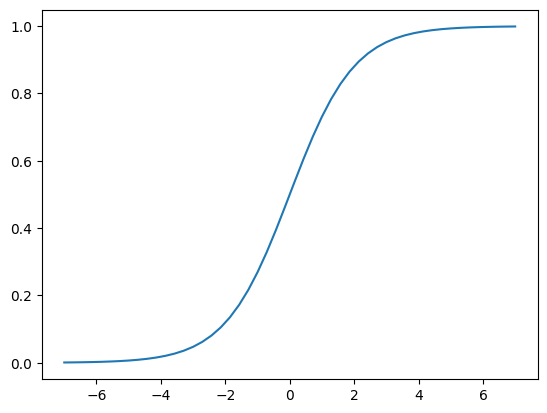

In [216]:
plt.plot(z, sigmoid(z))
# we can see that for negative x, y tends to zero, and for positive x, y tends to 1

In [220]:
sigmoid(-5)

np.float64(0.0066928509242848554)

In [221]:
# For Linear regression
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]
    
    return result

In [223]:
# For Logistic regression
# The difference is that it takes the sigmoid
# sigmoid brings the score as a probability
def linear_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

# Training Logistic regression with scikit-learn
- Train model with scikit-learn
- Apply model to validation dataset
- Calculate the accuracy

In [224]:
from sklearn.linear_model import LogisticRegression

In [225]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\abasi\OneDrive\Desktop\ml-zoomcamp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [232]:
model.coef_
# This shows the weights (w), a 2D array with one row

array([[ 0.29013637, -0.15699538, -0.24897672,  0.0615503 , -0.17738603,
         0.09900363, -0.09685234, -0.11798703, -0.02162664, -0.09420909,
        -0.28955892,  0.27057553, -0.09685234,  0.00133529, -0.19283141,
         0.03553581,  0.04145988,  0.11273312, -0.09685234, -0.13171651,
         0.28218967, -0.09685234, -0.30117307, -0.2567935 ,  0.14095777,
        -0.05448718, -0.06134854, -0.06958007, -0.1082453 ,  0.26654058,
        -0.20455093,  0.03553581, -0.15137153,  0.19700248, -0.07137677,
        -0.09685234,  0.05239338, -0.06255446, -0.09685234,  0.04357107,
         0.27172679, -0.09685234, -0.29071018, -0.06878402,  0.00040271]])

In [233]:
model.coef_[0].round(3)


array([ 0.29 , -0.157, -0.249,  0.062, -0.177,  0.099, -0.097, -0.118,
       -0.022, -0.094, -0.29 ,  0.271, -0.097,  0.001, -0.193,  0.036,
        0.041,  0.113, -0.097, -0.132,  0.282, -0.097, -0.301, -0.257,
        0.141, -0.054, -0.061, -0.07 , -0.108,  0.267, -0.205,  0.036,
       -0.151,  0.197, -0.071, -0.097,  0.052, -0.063, -0.097,  0.044,
        0.272, -0.097, -0.291, -0.069,  0.   ])

In [238]:
model.intercept_[0]
# This is the bias term

np.float64(-0.1163014016114102)

In [ ]:
# To start predicting with the model
model.predict(X_train)
# This gives hard prediction (churn, not churn - 0, 1)
# we need to know the certainty/probability

array([0, 1, 0, ..., 0, 0, 0], shape=(4225,))

In [ ]:
# we use a function that will tell us the probability
model.predict_proba(X_train)
# This gives soft predictions, a score between 0 - 1
# The first column is the probability of being in negative class
# The second column is probability of being in positive class (churning)

array([[0.7828035 , 0.2171965 ],
       [0.26379389, 0.73620611],
       [0.99847512, 0.00152488],
       ...,
       [0.86389813, 0.13610187],
       [0.89631471, 0.10368529],
       [0.92480541, 0.07519459]], shape=(4225, 2))

In [248]:
# Taking the first column (The churning probability)
y_pred = model.predict_proba(X_train)[:, 1]
y_pred

array([0.2171965 , 0.73620611, 0.00152488, ..., 0.13610187, 0.10368529,
       0.07519459], shape=(4225,))

In [249]:
# Using validation dataset
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.19059628, 0.2035421 , 0.28334277, ..., 0.00349876, 0.10510736,
       0.00155771], shape=(1409,))

In [252]:
# Setting the threshold as 50%
churn_decision = y_pred > 0.5
churn_decision

array([False, False, False, ..., False, False, False], shape=(1409,))

In [254]:
# These are all customers that will churn
df_val[churn_decision].customerid

10      6551-gnydg
16      0689-nkylf
18      3398-fshon
19      4704-eryfc
26      8258-gstjk
           ...    
1376    9850-owrhq
1387    1965-ddbwu
1388    2694-ciumo
1393    8837-vvwlq
1405    4273-mbhya
Name: customerid, Length: 330, dtype: object

In [255]:
# We check for the accuracy of our prediction
y_val

array([0, 1, 0, ..., 0, 0, 0], shape=(1409,))

In [256]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 0, 0], shape=(1409,))

In [ ]:
# To check how many matches
(y_val == churn_decision).mean()
# 80% matches

np.float64(0.794180269694819)

In [260]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [267]:
df_pred.iloc[17:50]
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.190596,0,0,True
1,0.203542,0,1,False
2,0.283343,0,0,True
3,0.337542,0,1,False
4,0.085830,0,0,True
...,...,...,...,...
1404,0.023483,0,0,True
1405,0.768939,1,0,False
1406,0.003499,0,0,True
1407,0.105107,0,0,True


In [270]:
df_pred.correct.mean()
# The model will predict the right churn decision for 80% of the time

np.float64(0.794180269694819)